In [3]:
import numpy as np

- 9/20 * np.log2(9/20) - 11/20 * np.log2(11/20)

0.9927744539878083

In [7]:
- 5/13 * np.log2(5/13) - 8/13 * np.log2(8/13)

0.9612366047228759

In [8]:
- 1/7 * np.log2(1/7) - 6/7 * np.log2(6/7)

0.5916727785823275

In [9]:
0.99 - 13/20*0.96 -7/20*0.6

0.156

In [10]:
- 4/4 * np.log2(4/4)

-0.0

In [11]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

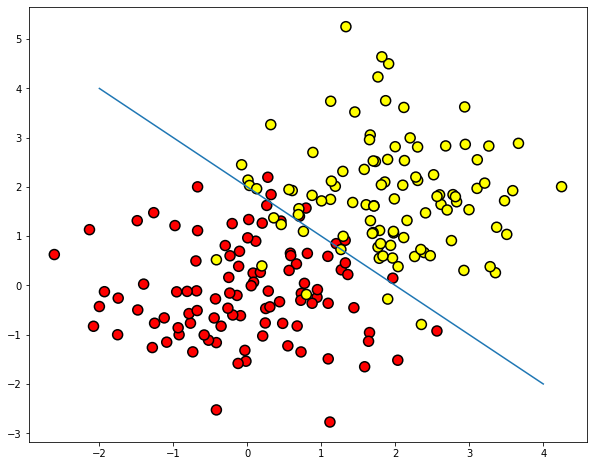

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

<ipython-input-15-81a1701a976a>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


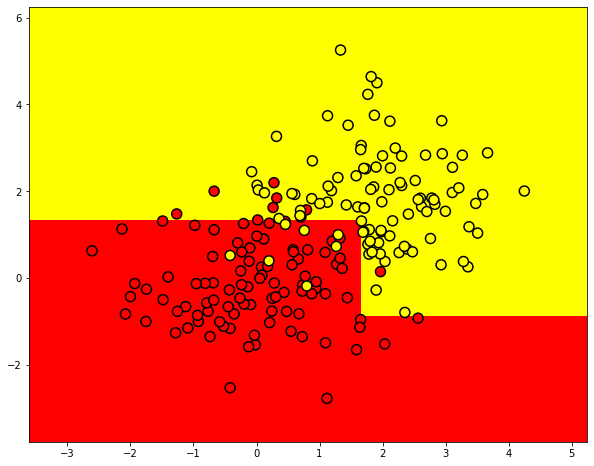

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);


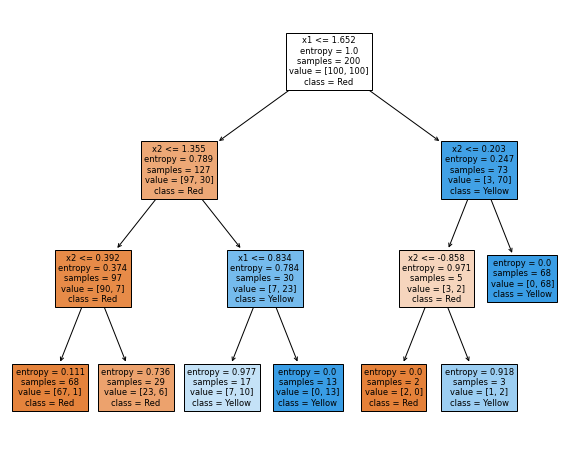

In [50]:
import sklearn.tree as tree

tree.plot_tree(clf_tree, feature_names=['x1', 'x2'], class_names=['Red', 'Yellow'],filled = True)
plt.show()

В начале было 200 объектов, 100 — одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака  со значением  (найдите этот участок границы на рисунке выше, до дерева). При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. При такой визуализации чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного класса поровну, поэтому корневая вершина дерева – белого цвета.

In [51]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/sample_data_tree.csv')

In [68]:
data.sort_values(by='Возраст')

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


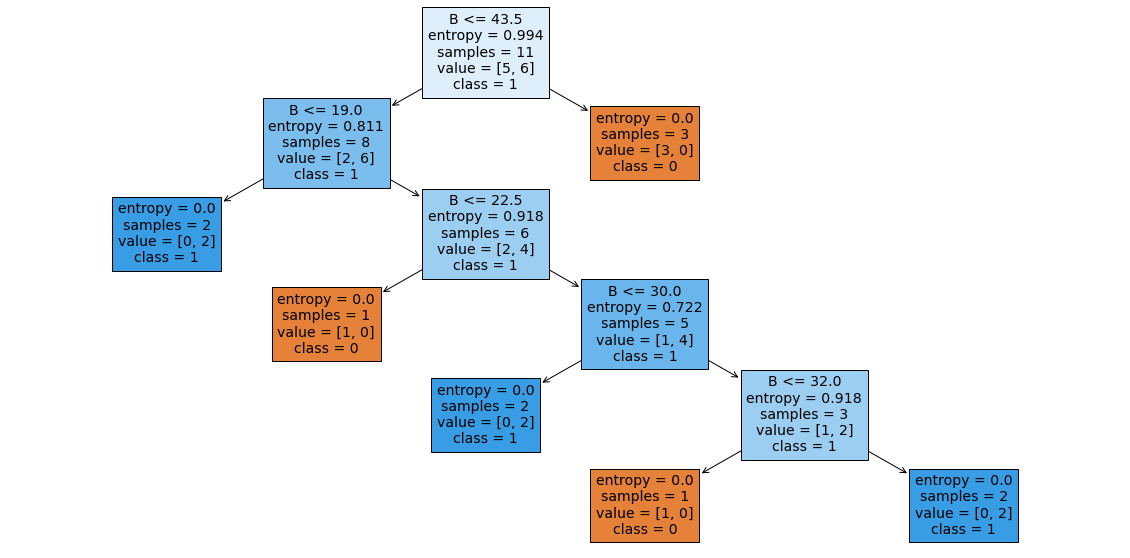

In [78]:
age_tree = DecisionTreeClassifier(random_state=17, criterion='entropy')
age_tree.fit(data['Возраст'].values.reshape(-1, 1), data['Невозврат кредита'].values)

plt.figure(figsize=(20,10))
tree.plot_tree(age_tree, feature_names = 'Возраст', class_names = ['0','1'], filled = True)
plt.show()

На картинке ниже видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение.

In [72]:
data.sort_values(by='Зарплата')

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


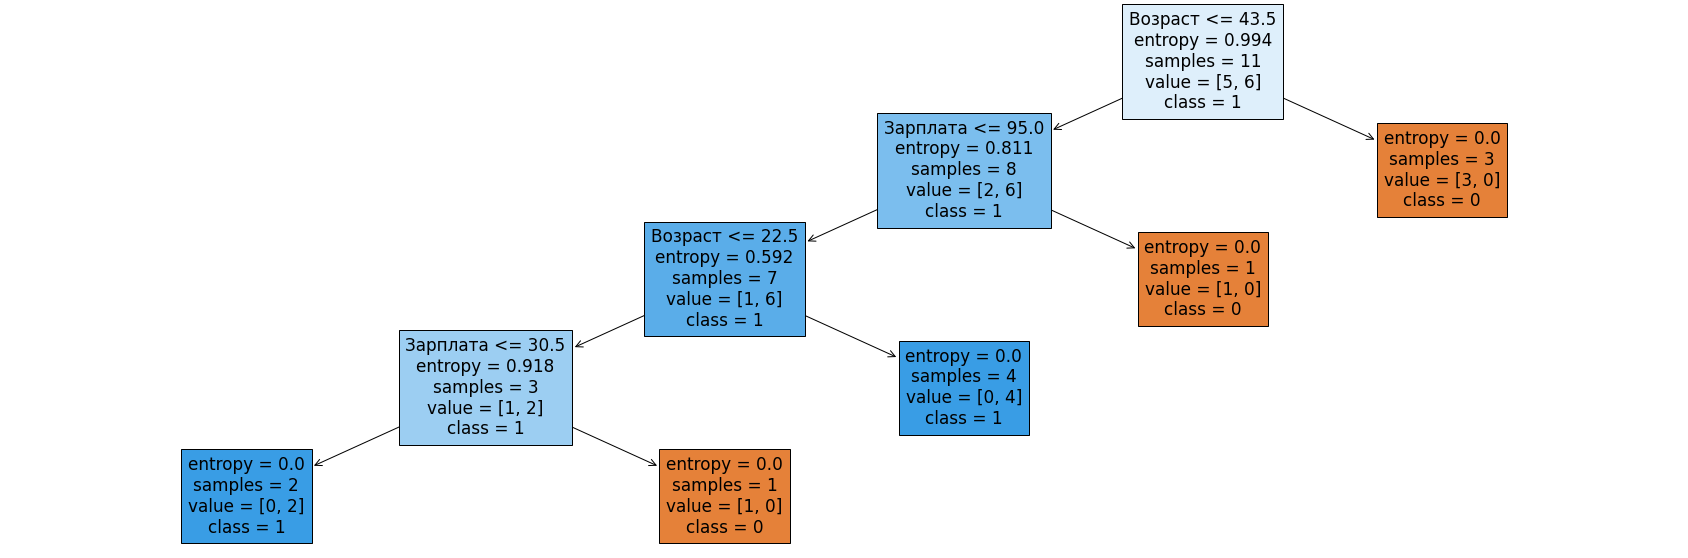

In [76]:
full_tree = DecisionTreeClassifier(random_state=17, criterion='entropy')
full_tree.fit(data[['Возраст', 'Зарплата']], data['Невозврат кредита'].values)

plt.figure(figsize=(30,10))
tree.plot_tree(full_tree, feature_names = ['Возраст', 'Зарплата'], class_names = ['0','1'], filled = True)
plt.show()

Вывод: самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. Звучит не очень строго, но надеюсь, я донес смысл с помощью игрушечных примеров.

Дополнительно, когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все того же критерия. То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.


Для иллюстрации: при разбиении по признаку "Зарплата  34.5" в левой подгруппе энтропия 0 (все клиенты "плохие"), а в правой – 0.954 (3 "плохих" и 5 "хороших", можете проверить, 1 часть домашнего задания будет как раз на то, чтоб разобраться досконально с построением деревьев). Прирост информации получается примерно 0.3.
А при разбиении по признаку "Зарплата  95" в левой подгруппе энтропия 0.97 (6 "плохих" и 4 "хороших"), а в правой – 0 (всего один объект). Прирост информации получается примерно 0.11.
Посчитав таким образом прирост информации для каждого разбиения, можно предварительно, до построения большого дерева (по всем признакам) отобрать пороги, с которыми будет сравниваться каждый количественный признак.

```python
class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)```

n_estimators — число деревьев в "лесу"
criterion — критерий для разбиения выборки в вершине
max_features — число признаков, по которым ищется разбиение
min_samples_leaf — минимальное число объектов в листе
max_depth — максимальная глубина дерева